<a href="https://colab.research.google.com/github/bismatariq123/CodeAlpa_DataScience_task2/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

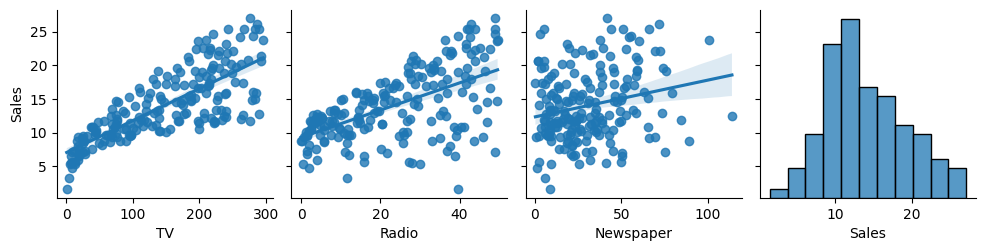

Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


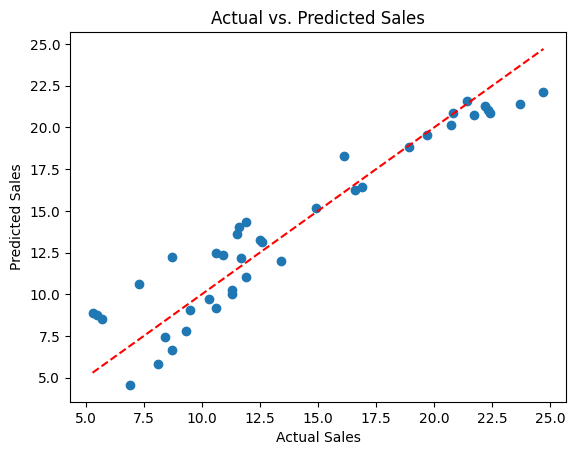

Coefficients:
TV: 0.044729517468716326
Radio: 0.18919505423437652
Newspaper: 0.0027611143413671935
Intercept: 2.979067338122629


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'advertising.csv' with the actual path to your downloaded dataset
data = pd.read_csv('/content/Advertising.csv')

# Explore the data
print(data.head())
print(data.info())
print(data.describe())

# Visualize relationships between features and sales
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper', 'Sales'], y_vars='Sales', kind='reg')
# Changed 'sales' to 'Sales' in x_vars to match the actual column name
plt.show()

# Prepare the data for modeling
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predicted vs. actual sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add a diagonal line
plt.show()

# Print the model coefficients
print("Coefficients:")
print(f"TV: {model.coef_[0]}")
print(f"Radio: {model.coef_[1]}")
print(f"Newspaper: {model.coef_[2]}")
print(f"Intercept: {model.intercept_}")

